In [1]:
import numpy as np
import random as r
import matplotlib.pyplot as plt

from constants import OBSERVATION
from brain import Brain

DEG = 180/np.pi

TODO:
+ make plants with seed dispersal + color + poison
+ 

In [2]:
def rotate(vec, angle):
    x = vec[0]
    y = vec[1]
    return np.array([x*np.cos(angle) - y*np.sin(angle), x*np.sin(angle) + y*np.cos(angle)])

In [5]:
dt = 0.05

class Organism:
    def __init__(self, connections):
        self.pos = np.array([0.0, 0.0])
        #self.velocity = np.array([0.0, 0.0])
        self.dir = 0
        self.health = 1.0
        self.energy = 1.0
        #self.acceleration_speed = 1.0
        self.max_speed = 1.0
        self.max_turn_speed = 10.0
        self.brain = Brain(connections)

    def observe(self, environment):
        food = environment.food
        displacement = rotate(food.pos - self.pos, -self.dir)
        distance = np.sqrt(np.power(displacement, 2).sum())
        angle = np.arctan2(displacement[1], displacement[0]) # returns 0 to pi then -pi to 0

        observation = OBSERVATION.copy()
        observation['food_distance'] = distance
        observation['food_angle'] = angle
        return observation

    
    def react(self, observation):
        action = self.brain.process(observation)
        accelerate = action['accelerate'] * self.max_speed * dt
        turn = action['turn'] * self.max_turn_speed * dt

        # update rotation
        self.dir += turn

        # update position
        self.pos += accelerate * np.array([np.cos(self.dir), np.sin(self.dir)])

class Food:
    def __init__(self, pos, connections):
        self.pos = pos

        self.age = 0.0

        self.energy = 1.0
        self.efficiency = 0.2

        self.size = 0.1
        self.max_grow_rate = 1.0

        self.seed_progress = 0.0
        self.fertility = 0.2
        self.dispersal = 0.1
        self.seed_size = 0.3

        self.brain = Brain(connections)

    def observe(self, environment):
        self.energy += self.efficiency * self.size * environment.sunlightAt(self.pos) * dt

        observation = OBSERVATION.copy()
        observation['age'] = self.age
        observation['health'] = self.health
        observation['energy'] = self.energy

    def react(self, observation):
        action = self.brain.process(observation)
        self.size += self.max_grow_rate * action['grow']
        self.seed_progress += self.fertility * action['reproduce']
        
        num_seeds = 0
        if self.seed_progress > self.seed_size:
            num_seeds = Math.floor(self.seed_progress/self.seed_size)
            self.seed_progress -= num_seeds * self.seed_size

        for i in range(num_seeds):
            dispersal_angle = np.random.rand()
            dispersal_dir = np.array([np.cos(dispersal_angle), np.sin(dispersal_angle)])
            seed_pos = self.pos + self.dispersal * dispersal_dir

In [ ]:
class Population:
    def __init__(self, size):
        connections = [
            ['food_distance', 'accelerate', 5*np.random.rand()],
            ['food_angle', 'turn', 5*np.random.rand()]
        ]

        self.critters = [Organism(connections) for _ in range(size)]

In [18]:
class Environment:
    def __init__(self, pos):
        self.food = Food(pos)

In [29]:
pop_size = 50
n_iterations = 200

organisms = [
    Organism(
        [['food_distance', 'accelerate', 5.0*np.random.rand()],
        ['food_angle', 'turn', 5.0*np.random.rand()]]
    ) for _ in range(pop_size)
]
environment = Environment(np.array([0, 5]))

observation_histories = []
pos_histories = []

for organism in organisms:
    observation_history = []
    pos_history = []

    for _ in range(n_iterations):
        observation = organism.observe(environment)
        organism.react(observation)

        observation_history.append(observation)
        pos_history.append([i for i in organism.pos])

    observation_histories.append(observation_history)
    pos_histories.append(pos_history)
    

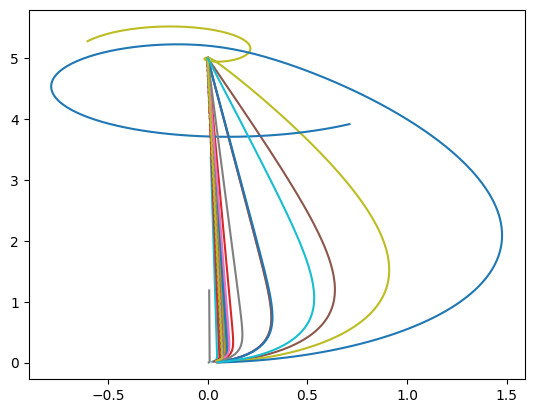

In [30]:
for i in range(pop_size):
    plt.plot(
        [pos_histories[i][j][0] for j in range(n_iterations)],
        [pos_histories[i][j][1] for j in range(n_iterations)]
    )
plt.show()

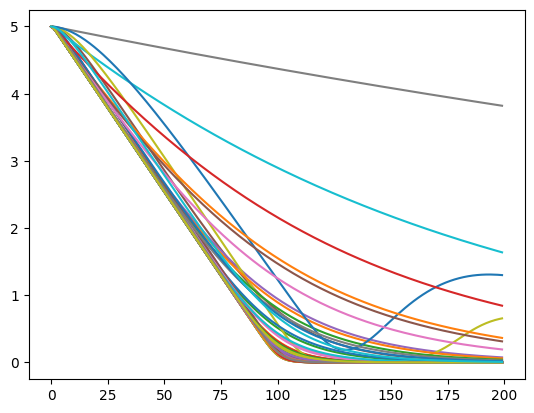

In [31]:

for i in range(pop_size):
    plt.plot(
        [observation_histories[i][j]['food_distance'] for j in range(n_iterations)]
    )
plt.show()

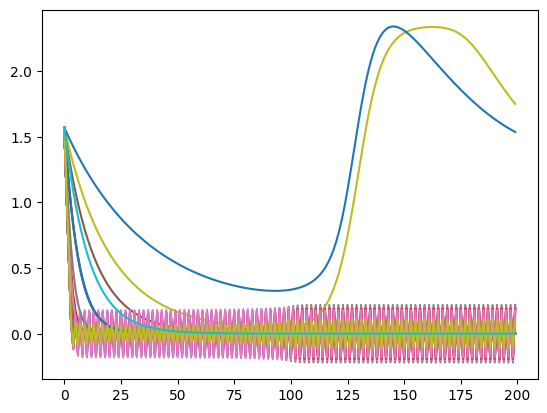

In [32]:
for i in range(pop_size):
    plt.plot(
        [observation_histories[i][j]['food_angle'] for j in range(n_iterations)]
    )
plt.show()